In [31]:
import os
os.chdir('/sasdata/corpid/a589565/Reinforcement Learning/Data_Science_Bootcamp_Codes/Data')

In [2]:
import sys
sys.path = ['/sasdata/corpid/a589565/conda'] + sys.path

import os
os.environ['KERAS_BACKEND']="theano"

In [3]:
import keras
print(keras.__version__)

ImportError: No module named keras

In [4]:
import numpy as np
import pandas as pd

# Curse of Dimensionality

(1, 0.008568423721159513, 0.2946739023435819, 0.029077647029525405)
(6, 0.25379493414964016, 0.9667753154902478, 0.2625169779194681)
(11, 0.738705821265062, 1.3104263423770046, 0.5637141114891746)
(16, 0.9950841752778639, 1.6156455482363306, 0.6159050024085523)
(21, 1.397088865167346, 1.858513081501817, 0.7517239878873461)
(26, 1.4808481069478945, 2.0765425327144875, 0.7131316039128308)
(31, 1.5530060802477086, 2.263369255433062, 0.6861479082654429)
(36, 1.845266560750287, 2.454633821235554, 0.7517482016203384)
(41, 2.129143670836968, 2.630911753351952, 0.8092797746348965)
(46, 1.979481142277655, 2.6968004828230385, 0.7340109714773982)
(51, 2.221036049228979, 2.8827397759970768, 0.7704601253717988)
(56, 2.2783530300936823, 3.018573380366692, 0.7547780832205283)
(61, 2.6958439331458197, 3.187013263662854, 0.8458841272745347)
(66, 2.78914114706725, 3.311823920801716, 0.8421767623419011)
(71, 2.9029302623153876, 3.403859937518776, 0.852834815650923)
(76, 2.9301052312953373, 3.505982918918

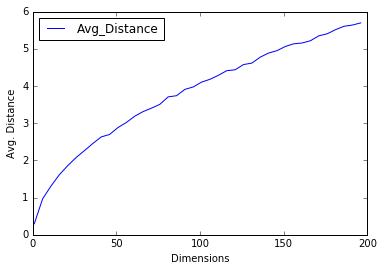

In [5]:
# KNN - Curse of Dimensionality
import random,math

def random_point_gen(dimension):
    return [random.random() for _ in range(dimension)]

def distance(v,w):
    vec_sub = [v_i-w_i for v_i,w_i in zip(v,w)]
    sum_of_sqrs = sum(v_i*v_i for v_i in vec_sub)
    return math.sqrt(sum_of_sqrs)

def random_distances_comparison(dimension,number_pairs):
    return [distance(random_point_gen(dimension),random_point_gen(dimension))
            for _ in range(number_pairs)]

def mean(x):
    return sum(x) / len(x)

dimensions = range(1, 201, 5)

avg_distances = []
min_distances = []


dummyarray = np.empty((20,4))
dist_vals = pd.DataFrame(dummyarray)
dist_vals.columns = ["Dimension","Min_Distance","Avg_Distance","Min/Avg_Distance"]

random.seed(34)
i = 0
for dims in dimensions:
    distances = random_distances_comparison(dims, 100)  
    avg_distances.append(mean(distances))    
    min_distances.append(min(distances))     
    
    dist_vals.loc[i,"Dimension"] = dims
    dist_vals.loc[i,"Min_Distance"] = min(distances)
    dist_vals.loc[i,"Avg_Distance"] = mean(distances)
    dist_vals.loc[i,"Min/Avg_Distance"] = min(distances)/mean(distances)
                 
    print(dims, min(distances), mean(distances), min(distances)*1.0 / mean(distances))
    i = i+1

# Ploting Average distances for Various Dimensions
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
#plt.title('Avg. Distance Change with Number of Dimensions for 1K Obs')
plt.xlabel('Dimensions')
plt.ylabel('Avg. Distance')
plt.plot(dist_vals["Dimension"],dist_vals["Avg_Distance"])
plt.legend(loc='best')
plt.show()

In [6]:
# 1-Dimension Plot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
one_d_data = np.random.rand(60,1)
one_d_data_df = pd.DataFrame(one_d_data)
one_d_data_df.columns = ["1D_Data"]
one_d_data_df["height"] = 1

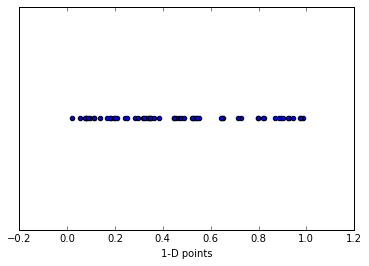

In [8]:
plt.figure()
plt.scatter(one_d_data_df['1D_Data'],one_d_data_df["height"])
plt.yticks([])
plt.xlabel("1-D points")
plt.show()

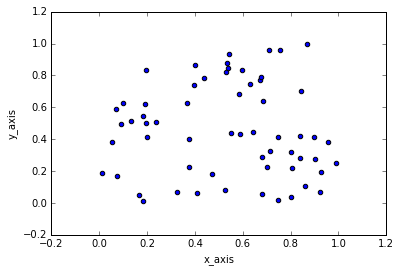

In [9]:
# 2- Dimensions Plot
two_d_data = np.random.rand(60,2)
two_d_data_df = pd.DataFrame(two_d_data)
two_d_data_df.columns = ["x_axis","y_axis"]

plt.figure()
plt.scatter(two_d_data_df['x_axis'],two_d_data_df["y_axis"])
plt.xlabel("x_axis");plt.ylabel("y_axis")
plt.show()

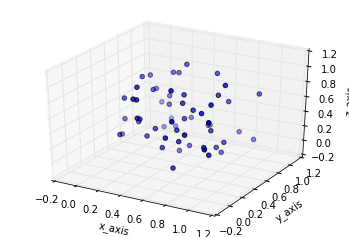

In [10]:
# 3- Dimensions Plot
three_d_data = np.random.rand(60,3)
three_d_data_df = pd.DataFrame(three_d_data)
three_d_data_df.columns = ["x_axis","y_axis","z_axis"]

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(three_d_data_df['x_axis'],three_d_data_df["y_axis"],three_d_data_df["z_axis"])
ax.set_xlabel('x_axis')
ax.set_ylabel('y_axis')
ax.set_zlabel('z_axis')
plt.show()

# KNN - Classifier

In [11]:
from sklearn.metrics import accuracy_score, classification_report

In [12]:
b_c_dataset = pd.read_csv('B_C_dataset.csv')

In [13]:
b_c_dataset.head(2)

,ID_NUMBER,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2


In [14]:
# Modify the Column Name
b_c_dataset.rename(columns = lambda x: x.replace(" ","_"), inplace=True)

In [15]:
b_c_dataset.head(2)

,ID_NUMBER,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2


In [16]:
b_c_dataset.columns

Index([u'ID_NUMBER', u'Clump_Thickness', u'Uniformity_of_Cell_Size',
       u'Uniformity_of_Cell_Shape', u'Marginal_Adhesion',
       u'Single_Epithelial_Cell_Size', u'Bare_Nuclei', u'Bland_Chromatin',
       u'Normal_Nucleoli', u'Mitoses', u'Class'],
      dtype='object')

# Treatment of missing values and anomalies removal

In [17]:
b_c_dataset['Bare_Nuclei']=b_c_dataset['Bare_Nuclei'].replace('?',np.NAN)
b_c_dataset['Bare_Nuclei']=b_c_dataset['Bare_Nuclei'].fillna(b_c_dataset['Bare_Nuclei'].value_counts().index[0])

b_c_dataset['Cancer_Ind'] = 0
b_c_dataset.loc[b_c_dataset['Class']==4,'Cancer_Ind']=1
b_c_dataset.head(2)
# Check the distribution of the Dep Class
from collections import Counter
Counter(b_c_dataset['Cancer_Ind'])

x_vars = b_c_dataset.drop(['ID_NUMBER','Class','Cancer_Ind'],axis=1)
y_var = b_c_dataset['Cancer_Ind']

In [18]:
from sklearn.preprocessing import StandardScaler
x_vars_stdscale = StandardScaler().fit_transform(x_vars.values)

/export/home/aaescore/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/export/home/aaescore/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [19]:
from sklearn.preprocessing import StandardScaler
x_vars_stdscle = StandardScaler().fit_transform(x_vars.values)
# from sklearn.model_selection import train_test_split
from sklearn.cross_validation import train_test_split
x_vars_stdscle_df = pd.DataFrame(x_vars_stdscle, index=x_vars.index, columns=x_vars.columns)
x_train,x_test,y_train,y_test = train_test_split(x_vars_stdscle_df,y_var,train_size = 0.7,random_state=42)

/export/home/aaescore/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/export/home/aaescore/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [20]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(489, 9)
(210, 9)
(489,)
(210,)


In [24]:
from sklearn.neighbors import KNeighborsClassifier as knn
knn_fit =knn(n_neighbors=3,p=2,metric='minkowski')
knn_fit.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [25]:
print ("K-Nearest Neighbors - Train Confusion Matrix ",pd.crosstab(y_train,knn_fit.predict(x_train),rownames = ["Actuall"],colnames = ["Predicted"]) )     
print ("K-Nearest Neighbors - Train accuracy:",round(accuracy_score(y_train,knn_fit.predict(x_train)),3))
print ("K-Nearest Neighbors - Train Classification Report ",classification_report(y_train,knn_fit.predict(x_train)))

('K-Nearest Neighbors - Train Confusion Matrix ', Predicted    0    1
Actuall            
0          309    6
1            4  170)
('K-Nearest Neighbors - Train accuracy:', 0.98)
('K-Nearest Neighbors - Train Classification Report ', '             precision    recall  f1-score   support\n\n          0       0.99      0.98      0.98       315\n          1       0.97      0.98      0.97       174\n\navg / total       0.98      0.98      0.98       489\n')


# Grid Search and Cross Validation

('\nK-value', 1)
('\nK-Nearest Neighbors - Train Confusion Matrix\n\n', Predicted    0    1
Actuall            
0          315    0
1            0  174)
('\nK-Nearest Neighbors - Train accuracy:', 1.0)
('\nK-Nearest Neighbors - Train Classification Report\n', '             precision    recall  f1-score   support\n\n          0       1.00      1.00      1.00       315\n          1       1.00      1.00      1.00       174\n\navg / total       1.00      1.00      1.00       489\n')
('\n\nK-Nearest Neighbors - Test Confusion Matrix\n\n', Predicted    0   1
Actuall           
0          141   2
1            7  60)
('\nK-Nearest Neighbors - Test accuracy:', 0.957)
('\nK-Nearest Neighbors - Test Classification Report\n', '             precision    recall  f1-score   support\n\n          0       0.95      0.99      0.97       143\n          1       0.97      0.90      0.93        67\n\navg / total       0.96      0.96      0.96       210\n')
('\nK-value', 2)
('\nK-Nearest Neighbors - Train Con

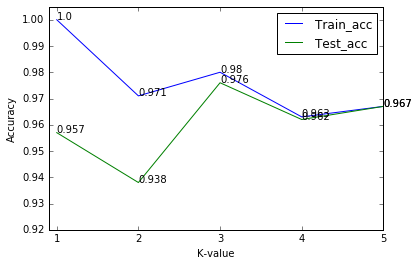

In [26]:
# Tuning the K-values for Train and Test Data
# Create a dummy array
# Tuning of K- value for Train & Test data
import matplotlib.pyplot as plt
%matplotlib inline
dummyarray = np.empty((5,3))
k_valchart = pd.DataFrame(dummyarray)
k_valchart.columns = ["K_value","Train_acc","Test_acc"]

k_vals = [1,2,3,4,5]
for i in range(len(k_vals)):
    knn_fit = knn(n_neighbors=k_vals[i],p=2,metric='minkowski')
    knn_fit.fit(x_train,y_train)

    print ("\nK-value",k_vals[i])
    
    tr_accscore = round(accuracy_score(y_train,knn_fit.predict(x_train)),3)
    print ("\nK-Nearest Neighbors - Train Confusion Matrix\n\n",pd.crosstab(y_train,knn_fit.predict(x_train),rownames = ["Actuall"],colnames = ["Predicted"]) )     
    print ("\nK-Nearest Neighbors - Train accuracy:",tr_accscore)
    print ("\nK-Nearest Neighbors - Train Classification Report\n",classification_report(y_train,knn_fit.predict(x_train)))

    ts_accscore = round(accuracy_score(y_test,knn_fit.predict(x_test)),3)    
    print ("\n\nK-Nearest Neighbors - Test Confusion Matrix\n\n",pd.crosstab(y_test,knn_fit.predict(x_test),rownames = ["Actuall"],colnames = ["Predicted"]))      
    print ("\nK-Nearest Neighbors - Test accuracy:",ts_accscore)
    print ("\nK-Nearest Neighbors - Test Classification Report\n",classification_report(y_test,knn_fit.predict(x_test)))
    
    k_valchart.loc[i, 'K_value'] = k_vals[i]      
    k_valchart.loc[i, 'Train_acc'] = tr_accscore     
    k_valchart.loc[i, 'Test_acc'] = ts_accscore               


# Ploting accuracies over varied K-values
import matplotlib.pyplot as plt
plt.figure()
#plt.title('KNN Train & Test Accuracy change with K-value')

plt.xlabel('K-value')
plt.ylabel('Accuracy')
plt.plot(k_valchart["K_value"],k_valchart["Train_acc"])
plt.plot(k_valchart["K_value"],k_valchart["Test_acc"])

plt.axis([0.9,5, 0.92, 1.005])
plt.xticks([1,2,3,4,5])

for a,b in zip(k_valchart["K_value"],k_valchart["Train_acc"]):
    plt.text(a, b, str(b),fontsize=10)

for a,b in zip(k_valchart["K_value"],k_valchart["Test_acc"]):
    plt.text(a, b, str(b),fontsize=10)
    
plt.legend(loc='upper right')    

plt.show()

# Application of PCA

In [32]:
#Application of PCA
# Importing the Data
import pandas as pd
import numpy as np
df_wine=pd.read_csv('wine_data.csv',header=None)
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 
'Alcalinity of ash', 'Magnesium', 'Total phenols', 
'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 
'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
#In order to print unique class label values
print('Class Labels',np.unique(df_wine['Class label']))
df_wine.head()

('Class Labels', array([1, 2, 3]))


,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [33]:
#Split the data into Train and Test
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
X,y=df_wine.iloc[:,1:].values,df_wine.iloc[:,0].values
X_train,X_test,y_train,y_test=\
            train_test_split(X,y,test_size=0.3,random_state=0)
sc=StandardScaler()
X_train_std=sc.fit_transform(X_train)
X_test_std=sc.transform(X_test)
y_train
y_test

array([1, 3, 2, 1, 2, 2, 1, 3, 2, 2, 3, 3, 1, 2, 3, 2, 1, 1, 2, 1, 2, 1, 1,
       2, 2, 2, 2, 2, 2, 3, 1, 1, 2, 1, 1, 1, 3, 2, 2, 3, 1, 1, 2, 2, 2, 1,
       3, 2, 3, 1, 3, 3, 1, 3])

In [34]:
import numpy as np
cov_mat=np.cov(X_train_std.T)
eigen_vals,eigen_vecs=np.linalg.eig(cov_mat)
print('\nEigenvalues \n%s' % eigen_vals)
print('\nEigenvectors \n%s' % eigen_vecs)
# Now, let's obtain the eigenpairs of the covariance matrix. As we surely remember
# from our introductory linear algebra or calculus classes, an eigenvalue v satisfies
# the following condition:
# V = Lambda(v)
# Here, Lambda is a scalar: the eigenvalue. Since the manual computation of eigenvectors
# and eigenvalues is a somewhat tedious and elaborate task, we will use the
# linalg.eig function from NumPy to obtain the eigenpairs of the Wine
# covariance matrix:


Eigenvalues 
[ 4.8923  2.4664  1.4281  1.0123  0.8491  0.6018  0.5225  0.0841  0.3305
  0.296   0.1683  0.2143  0.24  ]

Eigenvectors 
[[  1.4670e-01   5.0417e-01  -1.1724e-01   2.0625e-01  -1.8782e-01
   -1.4885e-01  -1.7926e-01  -5.5469e-02  -4.0305e-01  -4.1720e-01
    2.7566e-01   4.0357e-01   4.1332e-04]
 [ -2.4225e-01   2.4217e-01   1.4995e-01   1.3049e-01   5.6864e-01
   -2.6905e-01  -5.9264e-01   3.3273e-02  -1.0183e-01   2.1710e-01
   -8.1385e-02  -1.5247e-01  -8.7856e-02]
 [ -2.9934e-02   2.8698e-01   6.5639e-01   1.5154e-02  -2.9921e-01
   -9.3339e-02   6.0733e-02  -1.0062e-01   3.5184e-01   1.2855e-01
   -1.2975e-02   1.6838e-01  -4.5252e-01]
 [ -2.5519e-01  -6.4687e-02   5.8428e-01  -9.0422e-02  -4.1250e-02
   -1.0134e-01   2.5032e-01   5.6166e-02  -5.0046e-01   4.7334e-02
    9.8909e-02  -6.7090e-02   4.8617e-01]
 [  1.2080e-01   2.2995e-01   8.2263e-02  -8.3913e-01  -2.7197e-02
    1.1257e-01  -2.8524e-01   9.5842e-02   8.3739e-02  -2.7892e-01
   -9.5930e-02  -1.0240e-0

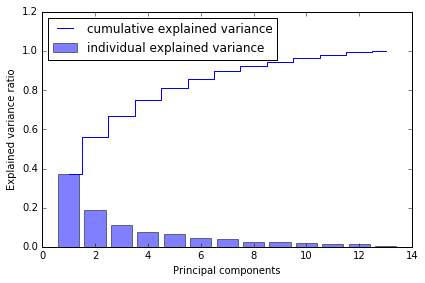

In [35]:
#Getting the Variance Explained Ratio for various eigen values
tot=sum(eigen_vals)
var_exp=[(i/tot) for i in sorted(eigen_vals,reverse=True)]
cum_var_exp=np.cumsum(var_exp)
import matplotlib.pyplot as plt
%matplotlib inline

plt.bar(range(1, 14), var_exp, alpha=0.5, align='center',
        label='individual explained variance')
plt.step(range(1, 14), cum_var_exp, where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
# plt.savefig('./figures/pca1.png', dpi=300)
plt.show()
# The resulting plot indicates that the first principal component alone accounts for
# 40 percent of the variance. Also, we can see that the first two principal components
# combined explain almost 60 percent of the variance in the data:

In [36]:
# Feature Transformations
# We start by sorting the eigenpairs by decreasing order of the eigenvalues:
eigen_pairs=[(np.abs(eigen_vals[i]),eigen_vecs[:,i]) for i in range(len(eigen_vals))]
eigen_pairs.sort(reverse=True)
# Next, we collect the two eigenvectors that correspond to the two largest values to
# capture about 60 percent of the variance in this dataset. Note that we only chose two
# eigenvectors for the purpose of illustration, since we are going to plot the data via
# a two-dimensional scatter plot later in this subsection. In practice, the number of
# principal components has to be determined from a trade-off between computational
# efficiency and the performance of the classifier:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W:\n', w)

('Matrix W:\n', array([[ 0.1467,  0.5042],
       [-0.2422,  0.2422],
       [-0.0299,  0.287 ],
       [-0.2552, -0.0647],
       [ 0.1208,  0.23  ],
       [ 0.3893,  0.0936],
       [ 0.4233,  0.0109],
       [-0.3063,  0.0187],
       [ 0.3057,  0.0304],
       [-0.0987,  0.5453],
       [ 0.3003, -0.2792],
       [ 0.3682, -0.1744],
       [ 0.2926,  0.3632]]))


In [37]:
# By executing the preceding code, we have created a 13× 2 -dimensional projection
# matrix W from the top two eigenvectors. Using the projection matrix, we can now
# transform a sample x (represented as 1×13-dimensional row vector) onto the PCA
# subspace obtaining x , a now two-dimensional sample vector consisting of two
# new features:
X_train_std[0].dot(w)
# Similarly, we can transform the entire 124×13-dimensional training dataset onto the
# two principal components by calculating the matrix dot product:
X_train_pca=X_train_std.dot(w)
print X_train_pca

[[ 2.5989  0.0048]
 [ 0.1582 -2.2666]
 [-2.6372  2.6649]
 [-2.5285  0.5185]
 [ 1.7092 -0.9172]
 [-2.8306  0.4194]
 [-2.8225  1.9976]
 [ 1.3662  0.0464]
 [-2.4658 -0.0793]
 [-2.2855 -0.401 ]
 [ 1.1425 -2.3959]
 [-2.285  -1.0927]
 [-2.5292  0.6477]
 [ 0.1692 -1.1265]
 [ 2.5309  1.058 ]
 [-0.716  -2.8037]
 [ 2.4692 -0.1587]
 [-0.5804 -0.6929]
 [ 0.5458  0.4104]
 [ 3.5605  1.4256]
 [ 1.5868 -1.5126]
 [ 2.5487 -0.0528]
 [-3.5934  0.8832]
 [-1.6041  2.4037]
 [ 1.4867 -1.4086]
 [ 0.0083 -2.049 ]
 [-0.1565 -2.8028]
 [-2.3986  2.4752]
 [-3.1355 -0.2942]
 [ 3.3022  0.4094]
 [-3.5307  1.7997]
 [-0.4557 -2.6124]
 [-0.5884 -1.983 ]
 [-1.1664 -0.8378]
 [ 1.0376 -1.3776]
 [ 1.9589 -1.6258]
 [ 2.7699  1.8607]
 [ 2.0615  1.3228]
 [ 0.8411 -2.0089]
 [ 3.5252  1.4188]
 [-3.825   0.1174]
 [ 1.7043 -0.4627]
 [-3.4448  0.8979]
 [ 3.1412  0.8025]
 [ 2.3415  1.6999]
 [ 1.2516 -0.9131]
 [ 3.5785  1.7815]
 [ 0.9305 -2.2675]
 [ 0.5046 -1.9619]
 [ 3.8225  2.8815]
 [-2.3762  2.1548]
 [-1.5552 -1.3843]
 [ 2.5113  1

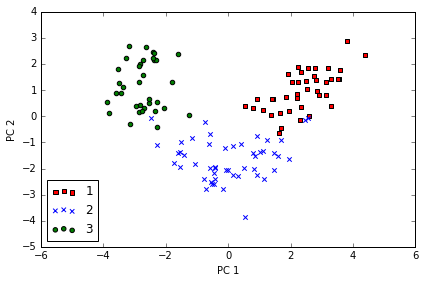

In [38]:
# Lastly, let's visualize the transformed Wine training set, now stored as an
# 124× 2 -dimensional matrix, in a two-dimensional scatterplot:
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train==l, 0], 
                X_train_pca[y_train==l, 1], 
                c=c, label=l, marker=m)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('./figures/pca2.png', dpi=300)
plt.show()

# PCA through SKLEARN

In [39]:
from sklearn.decomposition import PCA
pca=PCA()
X_train_pca=pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([ 0.3733,  0.1882,  0.109 ,  0.0772,  0.0648,  0.0459,  0.0399,
        0.0252,  0.0226,  0.0183,  0.0164,  0.0128,  0.0064])

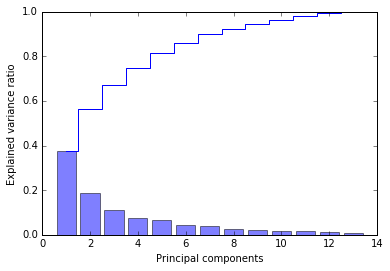

In [40]:
plt.bar(range(1, 14), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, 14), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

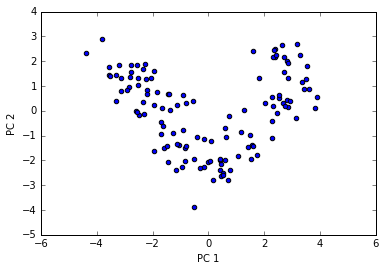

In [41]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
plt.scatter(X_train_pca[:,0], X_train_pca[:,1])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

In [42]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

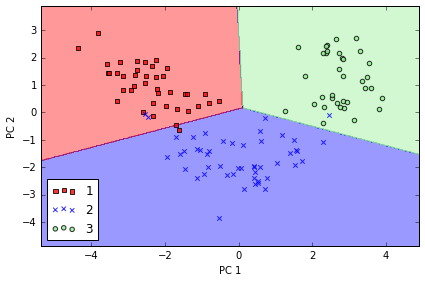

In [43]:
# Training logistic regression classifier using the first 2 principal components
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr = lr.fit(X_train_pca, y_train)
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('./figures/pca3.png', dpi=300)
plt.show()

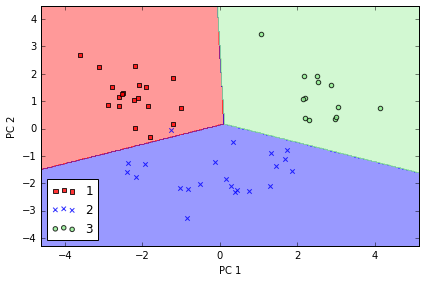

In [44]:
plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('./figures/pca4.png', dpi=300)
plt.show()

In [45]:
pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_
y_train
# Note that we set n_components=None when we initialized the PCA class so that
# it would return all principal components in sorted order instead of performing a
# dimensionality reduction.

array([1, 2, 3, 3, 2, 3, 3, 1, 2, 3, 2, 2, 3, 2, 1, 2, 2, 2, 1, 1, 2, 2, 3,
       3, 2, 2, 2, 3, 3, 1, 3, 2, 2, 2, 2, 2, 1, 1, 2, 1, 3, 1, 3, 1, 1, 2,
       1, 2, 2, 1, 3, 2, 1, 2, 2, 2, 3, 1, 3, 3, 1, 1, 2, 3, 1, 1, 2, 2, 1,
       1, 1, 3, 2, 1, 2, 3, 1, 2, 3, 3, 1, 1, 3, 1, 3, 2, 1, 1, 2, 1, 3, 2,
       3, 1, 3, 3, 3, 1, 2, 2, 2, 2, 3, 3, 2, 2, 1, 2, 3, 3, 1, 1, 3, 2, 2,
       2, 1, 1, 1, 2, 2, 2, 1, 3])

# Supervised data compression via linear discriminant analysis

In [47]:
np.set_printoptions(precision=4) #print numeric value upto 4 decimal place
mean_vecs=[]
for label in range(1,4):
    mean_vecs.append(np.mean(X_train_std[y_train==label],axis=0))
    print('MV %s: %s\n' %(label, mean_vecs[label-1]))

MV 1: [ 0.9259 -0.3091  0.2592 -0.7989  0.3039  0.9608  1.0515 -0.6306  0.5354
  0.2209  0.4855  0.798   1.2017]

MV 2: [-0.8727 -0.3854 -0.4437  0.2481 -0.2409 -0.1059  0.0187 -0.0164  0.1095
 -0.8796  0.4392  0.2776 -0.7016]

MV 3: [ 0.1637  0.8929  0.3249  0.5658 -0.01   -0.9499 -1.228   0.7436 -0.7652
  0.979  -1.1698 -1.3007 -0.3912]



In [49]:
d=13#Number of features
S_W=np.zeros((d,d))
for label,mv in zip(range(1,4),mean_vecs):
    class_scatter=np.zeros((d,d))
    for row in X[y==label]:
        row,mv=row.reshape(d,1),mv.reshape(d,1)
        class_scatter +=(row-mv).dot((row-mv).T)
    S_W += class_scatter
print('Within-class scatter matrix: %sx%s'% (S_W.shape[0], S_W.shape[1]))

print('Class label distribution: %s' 
      % np.bincount(y_train)[1:])

Within-class scatter matrix: 13x13
Class label distribution: [40 49 35]


In [50]:
d = 13 # number of features
S_W = np.zeros((d, d))
for label,mv in zip(range(1, 4), mean_vecs):
    class_scatter = np.cov(X_train_std[y_train==label].T)
    S_W += class_scatter
print('Scaled within-class scatter matrix: %sx%s' % (S_W.shape[0], S_W.shape[1]))

Scaled within-class scatter matrix: 13x13


# Compute the between-class scatter matrix:

In [51]:
mean_overall=np.mean(X_train_std,axis=0)
d = 13 # number of features
S_B = np.zeros((d, d))
for i, mean_vec in enumerate(mean_vecs):
    n=X[y==i+1,:].shape[0]
    mean_vec=mean_vec.reshape(d,1)
    mean_overall = mean_overall.reshape(d, 1) # make column vector
    S_B += n * (mean_vec - mean_overall).dot((mean_vec - mean_overall).T)
print('Between-class scatter matrix: %sx%s' % (S_B.shape[0], S_B.shape[1]))

Between-class scatter matrix: 13x13


Selecting linear discriminants for the new feature subspace

In [52]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]
# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs = sorted(eigen_pairs, key=lambda k: k[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues

print('Eigenvalues in decreasing order:\n')
for eigen_val in eigen_pairs:
    print(eigen_val[0])

Eigenvalues in decreasing order:

4.89230830327
2.46635031576
1.4280997275
1.0123346209
0.849064593345
0.601815143423
0.522515462064
0.330514291731
0.295950183659
0.239955304779
0.214322118699
0.168312535041
0.0841484567268


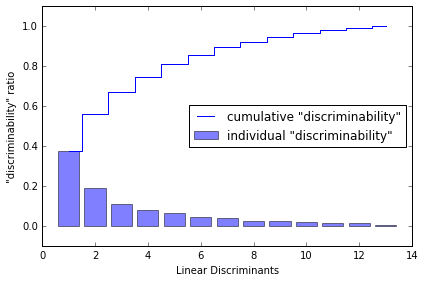

In [53]:
tot = sum(eigen_vals.real)
discr = [(i / tot) for i in sorted(eigen_vals.real, reverse=True)]
cum_discr = np.cumsum(discr)

plt.bar(range(1, 14), discr, alpha=0.5, align='center',
        label='individual "discriminability"')
plt.step(range(1, 14), cum_discr, where='mid',
         label='cumulative "discriminability"')
plt.ylabel('"discriminability" ratio')
plt.xlabel('Linear Discriminants')
plt.ylim([-0.1, 1.1])
plt.legend(loc='best')
plt.tight_layout()
# plt.savefig('./figures/lda1.png', dpi=300)
plt.show()

In [54]:
# Let's now stack the two most discriminative eigenvector columns to create the
# transformation matrix W :
w = np.hstack((eigen_pairs[0][1][:, np.newaxis].real,
                      eigen_pairs[1][1][:, np.newaxis].real))
print('Matrix W:\n', w)

('Matrix W:\n', array([[ 0.1467,  0.5042],
       [-0.2422,  0.2422],
       [-0.0299,  0.287 ],
       [-0.2552, -0.0647],
       [ 0.1208,  0.23  ],
       [ 0.3893,  0.0936],
       [ 0.4233,  0.0109],
       [-0.3063,  0.0187],
       [ 0.3057,  0.0304],
       [-0.0987,  0.5453],
       [ 0.3003, -0.2792],
       [ 0.3682, -0.1744],
       [ 0.2926,  0.3632]]))


# Projecting samples onto the new feature space

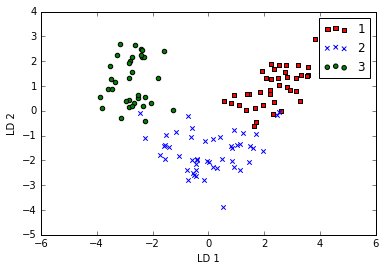

In [55]:
# Using the transformation matrix W that we created in the previous subsection,
# we can now transform the training data set by multiplying the matrices:
X_train_lda=X_train_std.dot(w)
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_lda[y_train==l, 0],
                X_train_lda[y_train==l, 1],
                c=c, label=l, marker=m)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='upper right')
plt.show()

# LDA via Sklearn

/export/home/aaescore/anaconda2/lib/python2.7/site-packages/sklearn/lda.py:4: DeprecationWarning: lda.LDA has been moved to discriminant_analysis.LinearDiscriminantAnalysis in 0.17 and will be removed in 0.19
  "in 0.17 and will be removed in 0.19", DeprecationWarning)


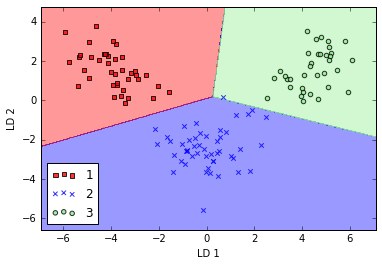

In [56]:
# The step-by-step implementation was a good exercise for understanding the inner
# workings of LDA and understanding the differences between LDA and PCA.
# Now, let's take a look at the LDA class implemented in scikit-learn:
from sklearn.lda import LDA
lda=LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y_train)
# Next, let's see how the logistic regression classifier handles the lower-dimensional
# training dataset after the LDA transformation:
lr=LogisticRegression()
lr=lr.fit(X_train_lda,y_train)
plot_decision_regions(X_train_lda, y_train, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.show()

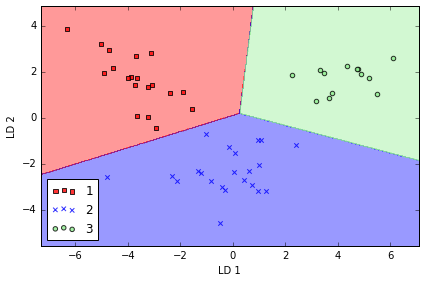

In [57]:
# Looking at the resulting plot, we see that the logistic regression model misclassifies
# one of the samples from class 2:
# By lowering the regularization strength, we could probably shift the decision
# boundaries so that the logistic regression models classify all samples in the training
# dataset correctly. However, let's take a look at the results on the test set:
X_test_lda = lda.transform(X_test_std)
plot_decision_regions(X_test_lda, y_test, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('./images/lda4.png', dpi=300)
plt.show()

# Application of QDA